In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
system_extraction_comparison = pd.read_csv("translations_scores/system_dialog_experiments.csv")

C:\Users\kajet\AppData\Local\Temp\ipykernel_21960\443000699.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


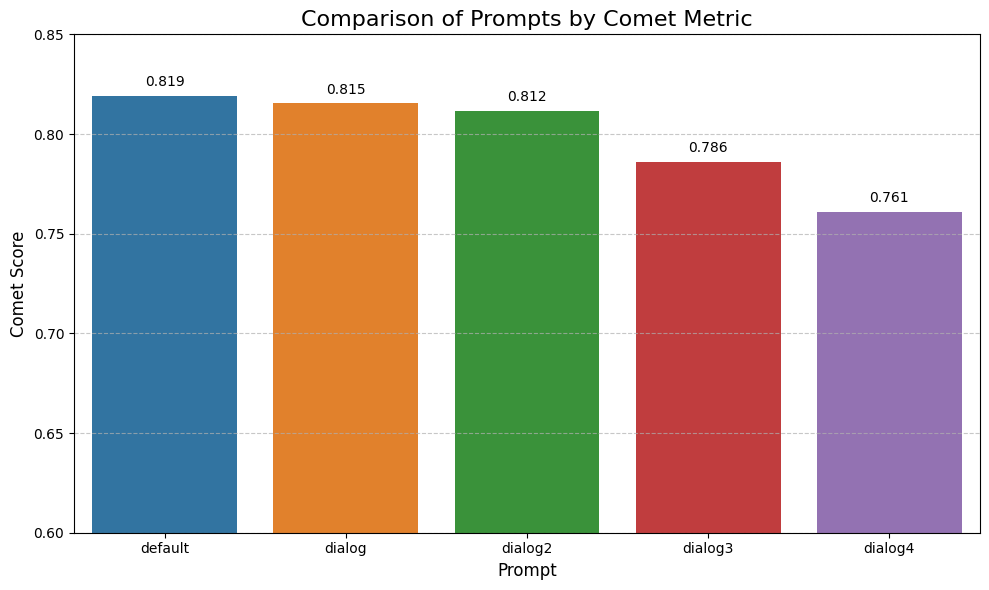

C:\Users\kajet\AppData\Local\Temp\ipykernel_21960\443000699.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


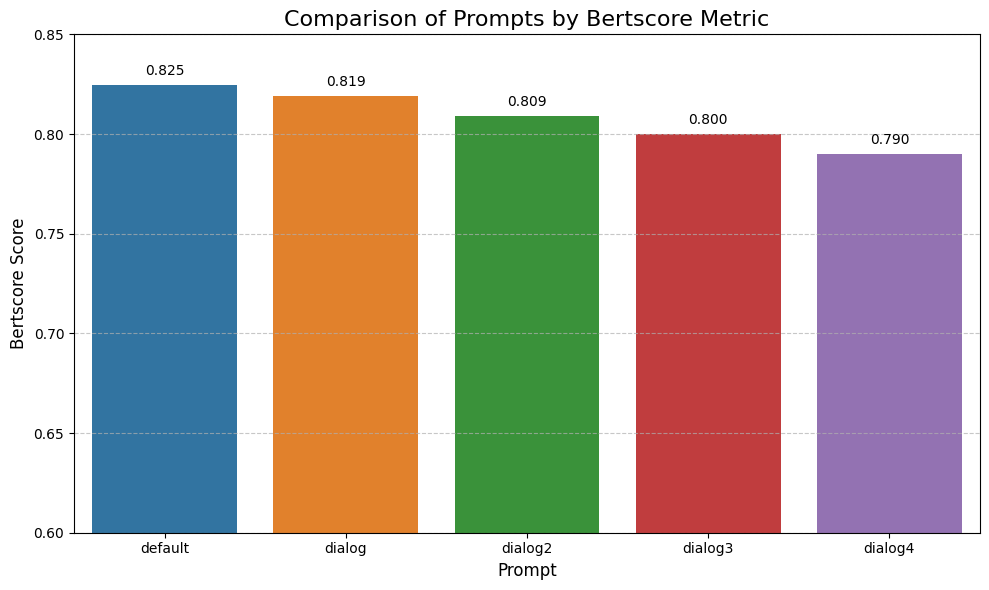

C:\Users\kajet\AppData\Local\Temp\ipykernel_21960\443000699.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


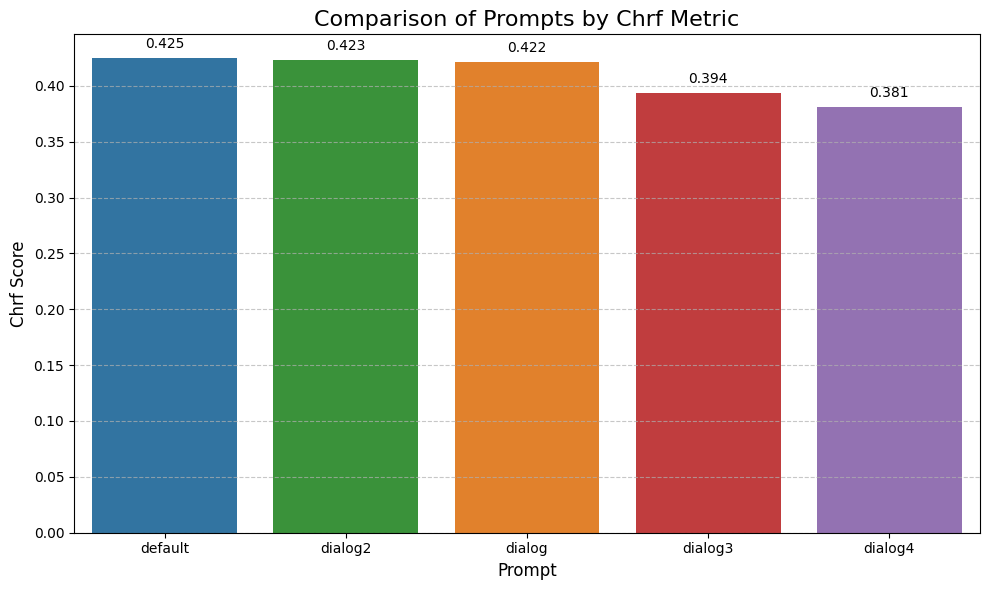

C:\Users\kajet\AppData\Local\Temp\ipykernel_21960\443000699.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


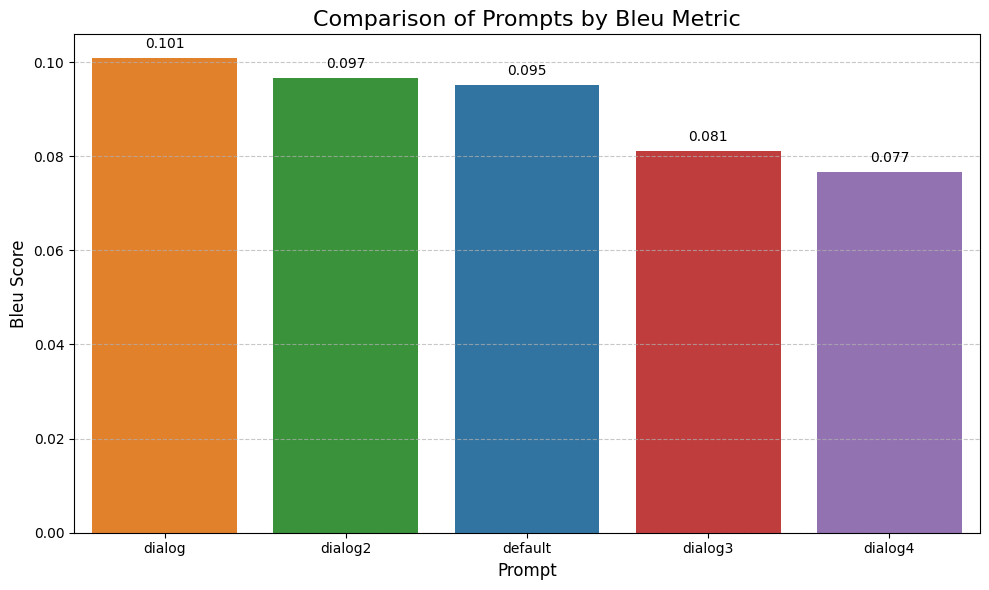

In [44]:
metrics = ["comet", "bertscore", "chrf", "bleu"]

# Create a fixed color palette mapped to prompt names
all_prompt_names = set()
for metric in metrics:
    metric_columns = [col for col in system_extraction_comparison.columns if metric in col.lower()]
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        all_prompt_names.add(prompt_name)

# Sort prompt names to have a consistent order
all_prompt_names = sorted(all_prompt_names)
palette = sns.color_palette("tab10", n_colors=len(all_prompt_names))
prompt_to_color = dict(zip(all_prompt_names, palette))

for metric in metrics:
    metric_columns = [col for col in system_extraction_comparison.columns if metric in col.lower()]
    
    data = []
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        score = system_extraction_comparison[col].iloc[0]
        data.append({"Prompt": prompt_name, "Score": score})

    plot_data = pd.DataFrame(data)
    plot_data = plot_data.sort_values(by="Score", ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=plot_data,
        x="Prompt",
        y="Score",
        palette=[prompt_to_color[prompt] for prompt in plot_data["Prompt"]]
    )

    # Add score value on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Comparison of Prompts by {metric.capitalize()} Metric", fontsize=16)
    plt.xlabel("Prompt", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    if metric == "bleu":
        plt.ylim()
    elif metric == "chrf":
        plt.ylim()
    else:
        plt.ylim(0.6, 0.85)
    
    plt.tight_layout()
    #plt.savefig(f"figs/{metric}_prompt_formats_comparision.png", dpi=300, bbox_inches='tight')
    plt.show()

In [45]:
extraction_comparison = pd.read_csv("translations_scores/dialog_experiments.csv")

In [46]:
extraction_comparison

,en_text,pl_text,default,dialog,dialog2,dialog3,dialog4,chrf_default,bleu_default,bertscore_default,...,bertscore_dialog2,comet_dialog2,chrf_dialog3,bleu_dialog3,bertscore_dialog3,comet_dialog3,chrf_dialog4,bleu_dialog4,bertscore_dialog4,comet_dialog4
0,Will you sell that racing mare of yours?,Sprzedajecie tę swoją klacz wyścigową?,Czy sprzedasz swoją klacz wyścigową?,Czy sprzedasz swoją klacz wyścigową?,Czy sprzedasz swoją klacz wyścigową?,Czy sprzedasz swoją klacz wyścigową?,Czy sprzedasz swoją klacz wyścigową?,0.666949,0.265915,0.916554,...,0.916554,0.953209,0.666949,0.265915,0.916554,0.953209,0.666949,0.265915,0.916554,0.953209
1,Radovid's army won't take ye. Man without a th...,Bez kciuka miecza nie utrzymasz. To do wojska ...,Armia Radovida cię nie weźmie. Człowiek bez kc...,Armia Radovida cię nie weźmie. Człowiek bez kc...,Armia Radovida cię nie weźmie. Człowiek bez kc...,Armia Radovida cię nie weźmie. Człowiek bez kc...,Radovid's army won't take ye. Man without a th...,0.547778,0.045770,0.817721,...,0.800977,0.776857,0.471490,0.045294,0.800977,0.776857,0.451209,0.019321,0.695795,0.579225
2,Think I found something might belong to you an...,"Chyba znalazłem coś, co należy do was. Ładunek...","Myślę, że znalazłem coś, co może należeć do ci...","Myślę, że znalazłem coś, co może należeć do ci...","Myślę, że znalazłem coś, co może należeć do ci...","Myślę, że znalazłem coś, co może należeć do ci...","Myślę, że znalazłem coś, co może należeć do ci...",0.619516,0.274123,0.871699,...,0.876166,0.767002,0.696479,0.372309,0.880980,0.796069,0.619516,0.274123,0.871699,0.781040
3,Nils…,Nils...,Nils...,Nils…,Nils…,Nils...\n\nTo wszystko. Tłumaczenie samej drug...,Nils...,1.000000,0.177828,1.000000,...,0.731820,0.989065,0.437424,0.027776,0.695019,0.586289,1.000000,0.177828,1.000000,0.989065
4,Scorn her not! Or have you friends so powerful...,Nie krzyw się! Czyżbyś miał aż tak potężnych p...,Nie gardź nią! Czy masz tak potężnych przyjaci...,Nie lekceważ jej! Czy masz tak potężnych przyj...,Nie gardź nią! Czyżbyś miał tak potężnych przy...,- Nie lekceważ jej! Czy masz tak potężnych prz...,Nie lekceważ jej! Czy masz tak potężnych przyj...,0.547980,0.249115,0.878145,...,0.929797,0.880386,0.436178,0.224577,0.830838,0.826123,0.436669,0.222501,0.839705,0.815481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"Scorned the axe, he did, severin' heads with t...","Toporem gardził, dwoma mieczami głowy ścinał.","Wzgardził toporem, on to uczynił, odcinał głow...","Wzgardził toporem, on to uczynił, odcinał głow...","Wzgardził toporem, on to uczynił, odcinał głow...","Pogardzał toporem, odcinał głowy dwoma mieczami.","Porzucił topór, on to zrobił, odcinał głowy dw...",0.610470,0.028518,0.815486,...,0.815486,0.676497,0.572113,0.048549,0.846782,0.833445,0.461945,0.028518,0.821616,0.643897
996,I understand… Won't take up any more of your t...,Rozumiem... W takim razie nie zabieram ci czas...,Rozumiem... Nie będę zabierać więcej twojego c...,Rozumiem... Nie będę zabierać już więcej Twoje...,Rozumiem... Nie będę zabierać już więcej twoje...,- Przepraszam... Nie mogę tego zrobić.\n- Rozu...,Nie mogę tego zrobić.,0.415876,0.029150,0.846969,...,0.839369,0.827354,0.334992,0.012846,0.760598,0.755223,0.060999,0.000000,0.682484,0.515899
997,"His new captive woman, she's from Nilfgaard, y...","Ta jego nowa branka, to jest z Nilfgaardu.","Jego nowa pojmana kobieta, ona jest z Nilfgaar...","Jego nowa pojmana kobieta, ona jest z Nilfgaar...","Jej nowa pojmana kobieta, ona jest z Nilfgaard...","Jego nowa pojmana kobieta jest z Nilfgaardu, w...","Jej nowa niewolnica pochodzi z Nilfgaardu, wiesz?",0.573370,0.056122,0.846570,...,0.842072,0.681415,0.575377,0.065006,0.837847,0.747907,0.352698,0.034052,0.798209,0.747520
998,Dwarves are hiding in the bushes.,Krasnoludy chowają się w krzakach.,Krasnoludy chowają się w krzakach.,Krasnoludy ukrywają się w krzakach.,Krasnoludy ukrywają się w krzakach.,"Kielich musi zostać odnaleziony.

In [47]:

sorted_df = extraction_comparison.sort_values(by='comet_default', ascending=True)

# Select the top 5 rows with the lowest values in column 'x'
top_5_lowest = sorted_df.head(5)

# Get the corresponding values from column 'y'
result = top_5_lowest[['comet_default', 'default', 'en_text', 'pl_text']]

result

,comet_default,default,en_text,pl_text
557,0.319715,Wypija chciwymi haustami.,"Drinks it down in greedy slurps,","Co u-pę-dzi, to wy-pi-je,"
278,0.338975,Umblest regards.\n\nNie otrzymałem żadnego tek...,Umblest regards.,"A kłaniam się, kłaniam."
951,0.380788,"No cóż, no cóż. Sztywna górna warga...","Now, now. Stiff upper lip…","Już, już. Nie rozklejaj się."
885,0.385475,Ponure karlenia.,Grimy churls.,Chamy buraczane.
600,0.388577,"Dalej, przyjacielu.","You're pushin' it, friend.",Za dużo sobie pozwalasz.


In [48]:
for index, row in top_5_lowest.iterrows():
    print(f"default: {row['default']}")
    print(f"dialog: {row['dialog']}")
    print(f"en_text: {row['en_text']}")
    print(f"pl_text: {row['pl_text']}")
    print()


default: Wypija chciwymi haustami.
dialog: Wypija to chciwymi haustami,
en_text: Drinks it down in greedy slurps,
pl_text: Co u-pę-dzi, to wy-pi-je,

default: Umblest regards.

Nie otrzymałem żadnego tekstu do przetłumaczenia poza "Umblest regards." Ponieważ jest to angielskie wyrażenie, które może być używane jako pozdrowienie lub zakończenie wiadomości, tłumaczenie na język polski brzmi:

"Serdeczne pozdrowienia."

To tłumaczenie oddaje ogólny ton i znaczenie oryginalnego wyrażenia.
dialog: Umblest regards.

Tłumaczenie: Najlepsze życzenia.
en_text: Umblest regards.
pl_text: A kłaniam się, kłaniam.

default: No cóż, no cóż. Sztywna górna warga...
dialog: Teraz, teraz. Sztywna górna warga...
en_text: Now, now. Stiff upper lip…
pl_text: Już, już. Nie rozklejaj się.

default: Ponure karlenia.
dialog: Brudne chamy.
en_text: Grimy churls.
pl_text: Chamy buraczane.

default: Dalej, przyjacielu.
dialog: Przesadzasz, przyjacielu.
en_text: You're pushin' it, friend.
pl_text: Za dużo sobie poz

In [49]:

sorted_df = extraction_comparison.sort_values(by='comet_dialog', ascending=True)

# Select the top 5 rows with the lowest values in column 'x'
top_5_lowest = sorted_df.head(5)

# Get the corresponding values from column 'y'
result = top_5_lowest[['comet_dialog', 'dialog', 'en_text', 'pl_text']]

result

,comet_dialog,dialog,en_text,pl_text
278,0.265373,Umblest regards.\n\nTłumaczenie: Najlepsze życ...,Umblest regards.,"A kłaniam się, kłaniam."
557,0.356282,"Wypija to chciwymi haustami,","Drinks it down in greedy slurps,","Co u-pę-dzi, to wy-pi-je,"
34,0.374885,Niech pamięć o nim trwa wiecznie.,Værthu Hemdall hael.,Værthu Hemdall hael.
748,0.380312,"Ach, do usług.","Ah, at your service.","A, kłaniam się."
916,0.391083,Twoja pora umierać.,Your time to die.,Czas ci zdychać.


In [50]:
system_extraction_comparison2 = pd.read_csv("translations_scores/system_dialog_extraction_experiments.csv")

In [51]:
system_extraction_comparison3 = pd.concat([system_extraction_comparison, system_extraction_comparison2], axis=1)

C:\Users\kajet\AppData\Local\Temp\ipykernel_21960\368339241.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


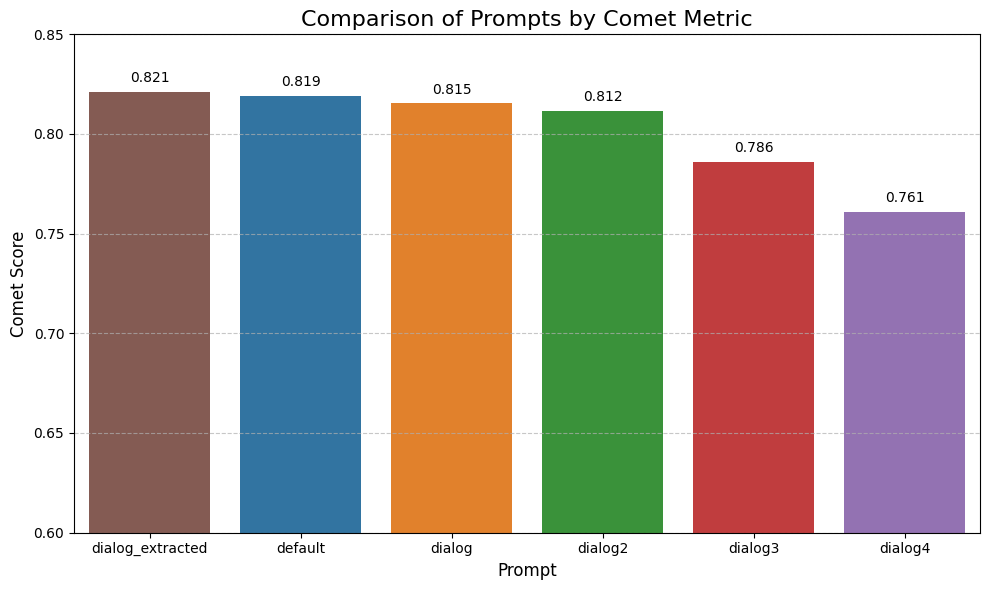

C:\Users\kajet\AppData\Local\Temp\ipykernel_21960\368339241.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


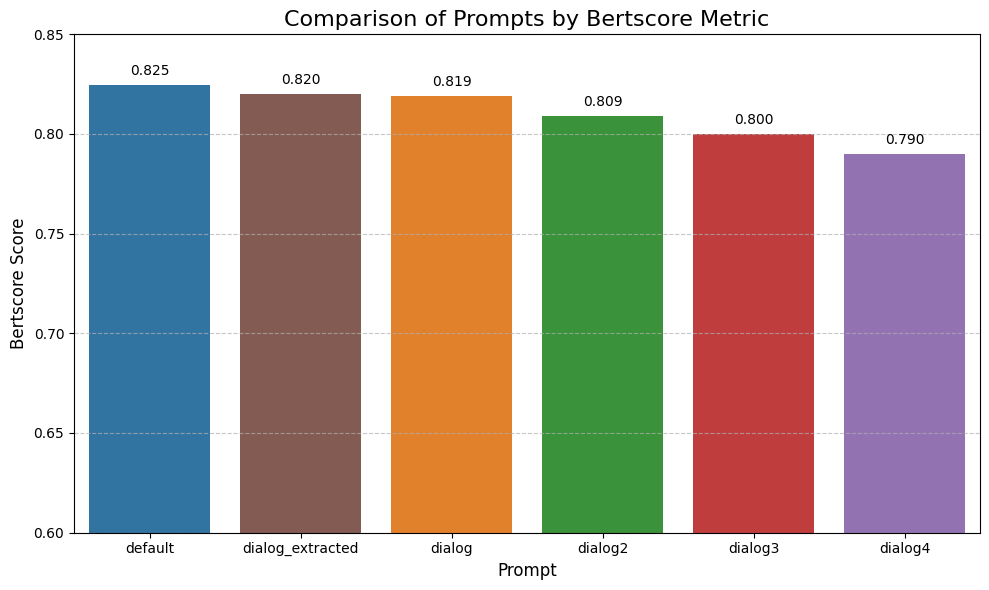

C:\Users\kajet\AppData\Local\Temp\ipykernel_21960\368339241.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


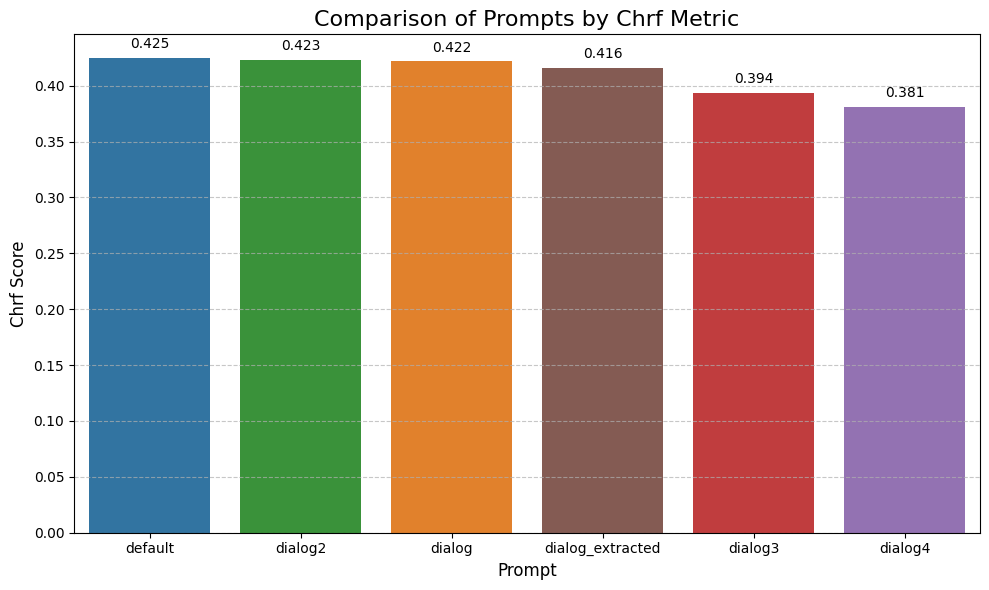

C:\Users\kajet\AppData\Local\Temp\ipykernel_21960\368339241.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


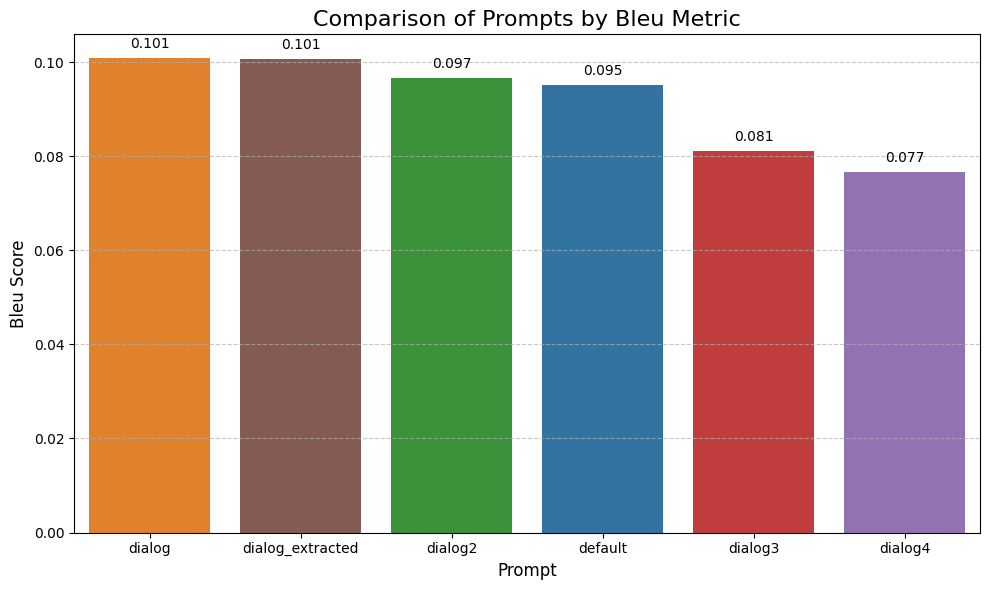

In [52]:
metrics = ["comet", "bertscore", "chrf", "bleu"]

# Create a fixed color palette mapped to prompt names
all_prompt_names = set()
for metric in metrics:
    metric_columns = [col for col in system_extraction_comparison3.columns if metric in col.lower()]
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        all_prompt_names.add(prompt_name)

# Sort prompt names to have a consistent order
all_prompt_names = sorted(all_prompt_names)
palette = sns.color_palette("tab10", n_colors=len(all_prompt_names))
prompt_to_color = dict(zip(all_prompt_names, palette))

for metric in metrics:
    metric_columns = [col for col in system_extraction_comparison3.columns if metric in col.lower()]
    
    data = []
    for col in metric_columns:
        parts = col.split("_")
        prompt_name = "_".join(parts[1:])
        score = system_extraction_comparison3[col].iloc[0]
        data.append({"Prompt": prompt_name, "Score": score})

    plot_data = pd.DataFrame(data)
    plot_data = plot_data.sort_values(by="Score", ascending=False)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=plot_data,
        x="Prompt",
        y="Score",
        palette=[prompt_to_color[prompt] for prompt in plot_data["Prompt"]]
    )

    # Add score value on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Comparison of Prompts by {metric.capitalize()} Metric", fontsize=16)
    plt.xlabel("Prompt", fontsize=12)
    plt.ylabel(f"{metric.capitalize()} Score", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    if metric == "bleu":
        plt.ylim()
    elif metric == "chrf":
        plt.ylim()
    else:
        plt.ylim(0.6, 0.85)
    
    plt.tight_layout()
    #plt.savefig(f"figs/{metric}_prompt_formats_comparision.png", dpi=300, bbox_inches='tight')
    plt.show()

In [53]:
extraction_comparison2 = pd.read_csv("translations_scores/dialog_extraction_experiments.csv")

In [54]:
extraction_comparison2

,en_text,pl_text,dialog_extracted,chrf_dialog_extracted,bleu_dialog_extracted,bertscore_dialog_extracted,comet_dialog_extracted
0,Will you sell that racing mare of yours?,Sprzedajecie tę swoją klacz wyścigową?,Czy sprzedasz swoją klacz wyścigową?,0.666949,0.265915,0.916554,0.953209
1,Radovid's army won't take ye. Man without a th...,Bez kciuka miecza nie utrzymasz. To do wojska ...,Armia Radovida cię nie weźmie. Człowiek bez kc...,0.471490,0.045294,0.800977,0.776857
2,Think I found something might belong to you an...,"Chyba znalazłem coś, co należy do was. Ładunek...","Myślę, że znalazłem coś, co może należeć do ci...",0.619516,0.274123,0.871699,0.781040
3,Nils…,Nils...,Nils…,0.297550,0.000000,0.731820,0.989065
4,Scorn her not! Or have you friends so powerful...,Nie krzyw się! Czyżbyś miał aż tak potężnych p...,Nie lekceważ jej! Czy masz tak potężnych przyj...,0.628380,0.428451,0.883184,0.850538
...,...,...,...,...,...,...,...
995,"Scorned the axe, he did, severin' heads with t...","Toporem gardził, dwoma mieczami głowy ścinał.","Wzgardził toporem, on tak czynił, odcinając gł...",0.590376,0.028518,0.797831,0.761309
996,I understand… Won't take up any more of your t...,Rozumiem... W takim razie nie zabieram ci czas...,Rozumiem... Nie będę już zajmować Ci więcej cz...,0.346913,0.028518,0.833656,0.834602
997,"His new captive woman, she's from Nilfgaard, y...","Ta jego nowa branka, to jest z Nilfgaardu.","Jego nowa pojmana kobieta jest z Nilfgaardu, w...",0.570734,0.065006,0.819843,0.781666
998,Dwarves are hiding in the bushes.,Krasnoludy chowają się w krzakach.,Krasnoludy ukrywają się w krzakach.,0.792465,0.285744,0.947742,0.975357


In [55]:
extraction_comparison2.columns

Index(['en_text', 'pl_text', 'dialog_extracted', 'chrf_dialog_extracted',
       'bleu_dialog_extracted', 'bertscore_dialog_extracted',
       'comet_dialog_extracted'],
      dtype='object')

In [56]:
extraction_comparison3 = pd.concat(
    [extraction_comparison, extraction_comparison2.iloc[:, 2:]],
    axis=1
)

In [57]:
extraction_comparison3.columns

Index(['en_text', 'pl_text', 'default', 'dialog', 'dialog2', 'dialog3',
       'dialog4', 'chrf_default', 'bleu_default', 'bertscore_default',
       'comet_default', 'chrf_dialog', 'bleu_dialog', 'bertscore_dialog',
       'comet_dialog', 'chrf_dialog2', 'bleu_dialog2', 'bertscore_dialog2',
       'comet_dialog2', 'chrf_dialog3', 'bleu_dialog3', 'bertscore_dialog3',
       'comet_dialog3', 'chrf_dialog4', 'bleu_dialog4', 'bertscore_dialog4',
       'comet_dialog4', 'dialog_extracted', 'chrf_dialog_extracted',
       'bleu_dialog_extracted', 'bertscore_dialog_extracted',
       'comet_dialog_extracted'],
      dtype='object')

In [58]:
sorted_df = extraction_comparison3.sort_values(by='comet_default', ascending=True)
top_5_lowest = sorted_df.head(5)
top_5_lowest

,en_text,pl_text,default,dialog,dialog2,dialog3,dialog4,chrf_default,bleu_default,bertscore_default,...,comet_dialog3,chrf_dialog4,bleu_dialog4,bertscore_dialog4,comet_dialog4,dialog_extracted,chrf_dialog_extracted,bleu_dialog_extracted,bertscore_dialog_extracted,comet_dialog_extracted
557,"Drinks it down in greedy slurps,","Co u-pę-dzi, to wy-pi-je,",Wypija chciwymi haustami.,"Wypija to chciwymi haustami,",Wypija to chciwymi haustami.,Wypija je chciwymi haustami.,"Pije go chciwie, jakby był głodny.",0.076130,0.0,0.570023,...,0.346603,0.088782,0.0,0.605698,0.490522,"Pije je chciwie, siorbiąc.",0.068588,0.0,0.609390,0.458243
278,Umblest regards.,"A kłaniam się, kłaniam.",Umblest regards.\n\nNie otrzymałem żadnego tek...,Umblest regards.\n\nTłumaczenie: Najlepsze życ...,'Szacunek dla umblersów.',Umblest regards → Pozdrowienia umblest (brak j...,Umblest regards.\n\nNiski ukłon.,0.100795,0.0,0.575902,...,0.322998,0.089410,0.0,0.587236,0.359227,Pozdrawiam cię najlepiej jak potrafię.,0.126559,0.0,0.690086,0.470685
951,"Now, now. Stiff upper lip…","Już, już. Nie rozklejaj się.","No cóż, no cóż. Sztywna górna warga...","Teraz, teraz. Sztywna górna warga...","Teraz, teraz. Sztywna górna warga...",- Bart! Przestań! Teraz!,"Bart przez dziurę, chce zobaczyć bum ma co. Od...",0.081210,0.0,0.670553,...,0.664507,0.093611,0.0,0.637215,0.350762,"No cóż, no cóż. Zaciśnij zęby...",0.103469,0.0,0.720434,0.632518
885,Grimy churls.,Chamy buraczane.,Ponure karlenia.,Brudne chamy.,"""Brudne chamy.""",Brudne prostaki.,Uważaj z tymi łapami!,0.089683,0.0,0.762288,...,0.403219,0.077014,0.0,0.579374,0.371097,Brudne chamy.,0.202532,0.0,0.734938,0.466495
600,"You're pushin' it, friend.",Za dużo sobie pozwalasz.,"Dalej, przyjacielu.","Przesadzasz, przyjacielu.","Przesuwasz granice, przyjacielu.","- Przesadzasz, stary.","Przesuwasz granice, przyjacielu.",0.089384,0.0,0.697305,...,0.493171,0.146818,0.0,0.695826,0.608275,"Przesadzasz, kolego.",0.130272,0.0,0.704682,0.579057


In [59]:
for index, row in top_5_lowest.iterrows():
    print(f"default: {row['default']}")
    print(f"dialog_extracted: {row['dialog_extracted']}")
    print(f"en_text: {row['en_text']}")
    print(f"pl_text: {row['pl_text']}")
    print()


default: Wypija chciwymi haustami.
dialog_extracted: Pije je chciwie, siorbiąc.
en_text: Drinks it down in greedy slurps,
pl_text: Co u-pę-dzi, to wy-pi-je,

default: Umblest regards.

Nie otrzymałem żadnego tekstu do przetłumaczenia poza "Umblest regards." Ponieważ jest to angielskie wyrażenie, które może być używane jako pozdrowienie lub zakończenie wiadomości, tłumaczenie na język polski brzmi:

"Serdeczne pozdrowienia."

To tłumaczenie oddaje ogólny ton i znaczenie oryginalnego wyrażenia.
dialog_extracted: Pozdrawiam cię najlepiej jak potrafię.
en_text: Umblest regards.
pl_text: A kłaniam się, kłaniam.

default: No cóż, no cóż. Sztywna górna warga...
dialog_extracted: No cóż, no cóż. Zaciśnij zęby...
en_text: Now, now. Stiff upper lip…
pl_text: Już, już. Nie rozklejaj się.

default: Ponure karlenia.
dialog_extracted: Brudne chamy.
en_text: Grimy churls.
pl_text: Chamy buraczane.

default: Dalej, przyjacielu.
dialog_extracted: Przesadzasz, kolego.
en_text: You're pushin' it, friend.

In [62]:
sorted_df = extraction_comparison3.sort_values(by='comet_dialog_extracted', ascending=True)
top_5_lowest = sorted_df.head(10)
top_5_lowest

,en_text,pl_text,default,dialog,dialog2,dialog3,dialog4,chrf_default,bleu_default,bertscore_default,...,comet_dialog3,chrf_dialog4,bleu_dialog4,bertscore_dialog4,comet_dialog4,dialog_extracted,chrf_dialog_extracted,bleu_dialog_extracted,bertscore_dialog_extracted,comet_dialog_extracted
34,Værthu Hemdall hael.,Værthu Hemdall hael.,Witaj Hemdall.,Niech pamięć o nim trwa wiecznie.,Niech pamięć o nich zaginie.,Niech pamięć o nim zaginie.,Niech pamięć o nich zaginie w otchłani zapomni...,0.329389,0.000000,0.758068,...,0.388944,0.072816,0.000000,0.639122,0.374313,Niech pamięć o nim trwa wiecznie.,0.078947,0.0,0.616812,0.374885
748,"Ah, at your service.","A, kłaniam się.","Ach, do państwa dyspozycji.","Ach, do usług.","Ach, do usług.","Ach, do usług.","Ach, do usług.",0.082742,0.000000,0.725306,...,0.380312,0.064599,0.000000,0.717302,0.380312,"Ach, do usług.",0.064599,0.0,0.717302,0.380312
916,Your time to die.,Czas ci zdychać.,Twoje czas umierać.,Twoja pora umierać.,Twoja pora umierać.,Twoja kolej na umieranie.,Twoja kolej umierać.,0.170466,0.000000,0.804983,...,0.598950,0.096187,0.000000,0.748509,0.588929,Twoja pora umierać.,0.096888,0.0,0.730031,0.391083
211,Me oh my!,Łojejku!,Ojejku!,Och!,'Och mój Boże!',Och!,Ach! Znałaś króla Brana?,0.605332,0.000000,0.873445,...,0.608100,0.035842,0.000000,0.657939,0.615599,Me oh my!,0.063291,0.0,0.697921,0.422687
127,We'll talk inside.,Zapraszam.,Porozmawiamy w środku.,Porozmawiamy w środku.,Porozmawiamy w środku.,Porozmawiamy w środku.,Porozmawiamy w środku.,0.107576,0.000000,0.637099,...,0.445930,0.107576,0.000000,0.637099,0.445930,Porozmawiamy w środku.,0.107576,0.0,0.637099,0.445930
416,Coalle… Coalle… Caniatad…,Coalle... Coalle... Caniatad...,Coalle... Coalle... Caniatad...,Coalle... Coalle... Cicho...,"""Cicho... Cicho... Zamknij się...""","Nie widzę, cicho! Cicho, cicho, nie mówię.",Coalle... Coalle... Caniatad...\n\n(Tłumaczeni...,1.000000,0.562341,1.000000,...,0.429804,0.817393,0.104455,0.780418,0.659898,"Nie widzę, nie słyszę! Cicho, cicho, nie mów nic.",0.055377,0.0,0.599814,0.456476
557,"Drinks it down in greedy slurps,","Co u-pę-dzi, to wy-pi-je,",Wypija chciwymi haustami.,"Wypija to chciwymi haustami,",Wypija to chciwymi haustami.,Wypija je chciwymi haustami.,"Pije go chciwie, jakby był głodny.",0.076130,0.000000,0.570023,...,0.346603,0.088782,0.000000,0.605698,0.490522,"Pije je chciwie, siorbiąc.",0.068588,0.0,0.609390,0.458243
73,Gut the mutant!,Zatłuc mutanta!,Wypieprz mutanta!,Dobrać mutanta!,Zabij mutanta!,Zabij mutanta!,Wypatrosz mutanta!,0.458360,0.149535,0.886425,...,0.878481,0.490336,0.149535,0.860467,0.716310,Dobra robota z mutantem!,0.329935,0.0,0.805511,0.462729
885,Grimy churls.,Chamy buraczane.,Ponure karlenia.,Brudne chamy.,"""Brudne chamy.""",Brudne prostaki.,Uważaj z tymi łapami!,0.089683,0.000000,0.762288,...,0.403219,0.077014,0.000000,0.579374,0.371097,Brudne chamy.,0.202532,0.0,0.734938,0.466495
282,Geralt of Rivia.,Geralt z Rivii.,Geralt z Rivii.,Geralt z Rivii.,Geralt z Rivii.,Jestem Jutta an Dimun. Nikt nie może mi dorówn...,Jestem Jutta an Dimun. Żaden mężczyzna nie był...,1.000000,0.562341,1.000000,...,0.475032,0.102397,0.000000,0.639829,0.460130,Jestem Jutta an Dimun. Nikt nie może mnie poko...,0.091561,0.0,0.642970,0.467352


In [63]:
for index, row in top_5_lowest.iterrows():
    print(f"default: {row['default']}")
    print(f"dialog_extracted: {row['dialog_extracted']}")
    print(f"en_text: {row['en_text']}")
    print(f"pl_text: {row['pl_text']}")
    print()


default: Witaj Hemdall.
dialog_extracted: Niech pamięć o nim trwa wiecznie.
en_text: Værthu Hemdall hael.
pl_text: Værthu Hemdall hael.

default: Ach, do państwa dyspozycji.
dialog_extracted: Ach, do usług.
en_text: Ah, at your service.
pl_text: A, kłaniam się.

default: Twoje czas umierać.
dialog_extracted: Twoja pora umierać.
en_text: Your time to die.
pl_text: Czas ci zdychać.

default: Ojejku!
dialog_extracted: Me oh my!
en_text: Me oh my!
pl_text: Łojejku!

default: Porozmawiamy w środku.
dialog_extracted: Porozmawiamy w środku.
en_text: We'll talk inside.
pl_text: Zapraszam.

default: Coalle... Coalle... Caniatad...
dialog_extracted: Nie widzę, nie słyszę! Cicho, cicho, nie mów nic.
en_text: Coalle… Coalle… Caniatad…
pl_text: Coalle... Coalle... Caniatad...

default: Wypija chciwymi haustami.
dialog_extracted: Pije je chciwie, siorbiąc.
en_text: Drinks it down in greedy slurps,
pl_text: Co u-pę-dzi, to wy-pi-je,

default: Wypieprz mutanta!
dialog_extracted: Dobra robota z mutante